# Simple Exloratory Data Analysis

In [1]:
import os
import pandas as pd
import numpy as np
import scipy.stats as st
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## # Read Dataset

In [2]:
tbc_dir = os.path.join('Health_DataSet', 'Tuberculosis incidence (per 100,000 people).xlsx')
u5_dir = os.path.join('Health_DataSet', 'Mortality rate, under-five (per 1,000 live births).xlsx')
adl_dir = os.path.join('Health_DataSet', 'Mortality rate, male adult (per 1,000 people).xlsx')

In [3]:
tbc_cols = [0, 1, 2, 4, 6, 8, 10, 12, 14, 16, 18]
u5_cols = [0, 1, 6, 8, 10, 12, 14, 16, 18, 20, 22]
adl_cols = [0, 1, 6, 8, 10, 12, 14, 16, 18, 20, 22]

tbc_data = pd.read_excel(tbc_dir, usecols=tbc_cols, header=1, na_values = ["..", 'n.a'])
u5_data = pd.read_excel(u5_dir, usecols=u5_cols, header=1, na_values = ["..", 'n.a'])
adl_data = pd.read_excel(adl_dir, usecols=adl_cols, header=1, na_values = ["..", 'n.a'])

In [4]:
tbc_data.tail()

,HDI Rank (2017),Country,2000,2005,2010,2011,2012,2013,2014,2015,2016
190,116.0,Viet Nam,197.0,176.0,155.0,151.0,147.0,144.0,140.0,137.0,133.0
191,178.0,Yemen,116.0,80.0,52.0,50.0,48.0,48.0,48.0,48.0,48.0
192,144.0,Zambia,759.0,602.0,495.0,475.0,456.0,437.0,406.0,391.0,376.0
193,156.0,Zimbabwe,605.0,588.0,416.0,384.0,355.0,304.0,278.0,242.0,208.0
194,17.0,Liechtenstein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
u5_data.tail()

,HDI Rank (2017),Country,2000,2005,2010,2011,2012,2013,2014,2015,2016
190,178.0,Yemen,95.1,72.7,56.3,55.5,55.3,55.3,55.3,55.3,55.3
191,144.0,Zambia,160.6,110.1,83.1,79.9,76.1,72.9,69.6,66.1,63.4
192,156.0,Zimbabwe,96.8,99.7,89.9,83.8,76.0,70.0,64.3,59.9,56.4
193,7.0,"Hong Kong, China (SAR)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,17.0,Liechtenstein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
adl_data.tail()

,HDI Rank (2017),Country,2000,2005,2010,2011,2012,2013,2014,2015,2016
190,NaN,Monaco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,NaN,Nauru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,60.0,Palau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,NaN,San Marino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,NaN,Tuvalu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
tbc_data.shape, u5_data.shape, adl_data.shape

((195, 11), (195, 11), (195, 11))

## # Visualising Missing Values

##### Matrix

TBC :
 HDI Rank (2017)    6
Country            0
2000               5
2005               2
2010               2
2011               1
2012               1
2013               1
2014               1
2015               1
2016               1
dtype: int64


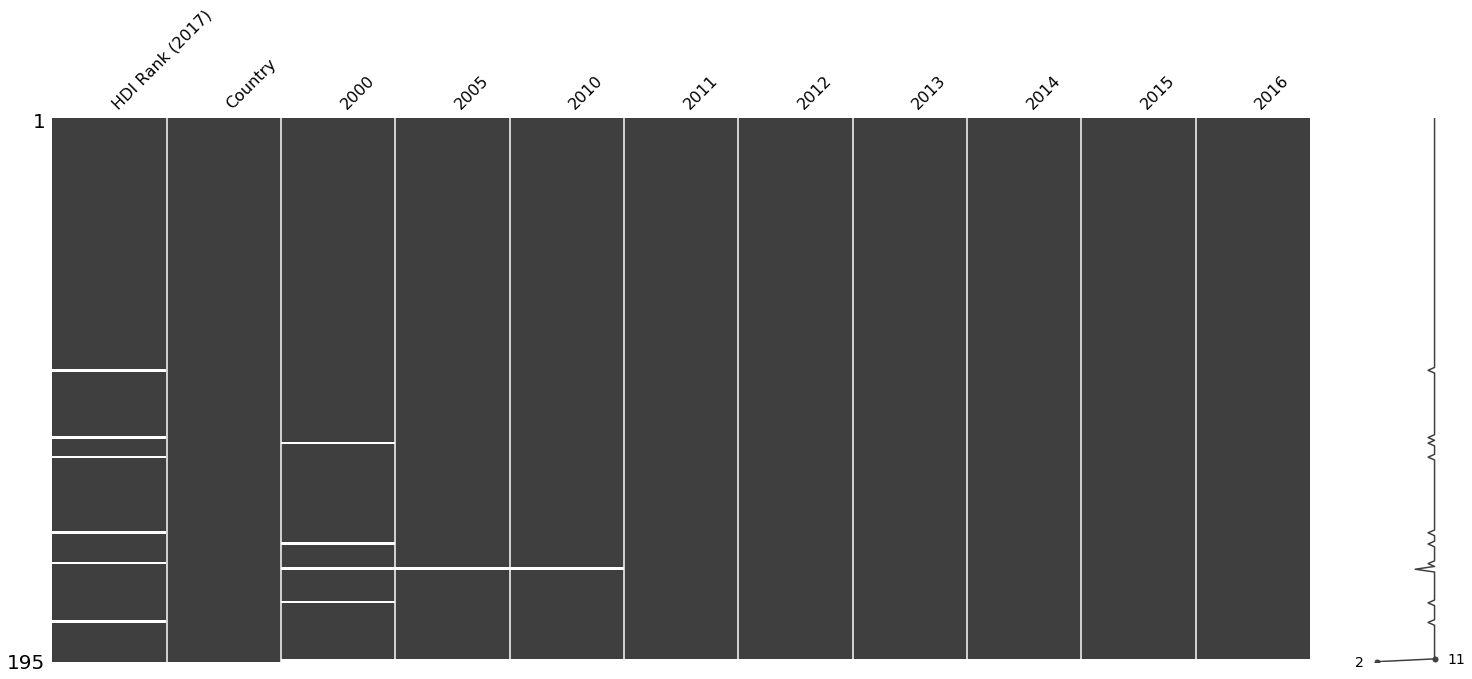

In [8]:
### TBC Data
print('TBC :\n', tbc_data.isna().sum())

msno.matrix(tbc_data);

TBC :
 HDI Rank (2017)    6
Country            0
2000               2
2005               2
2010               2
2011               2
2012               2
2013               2
2014               2
2015               2
2016               2
dtype: int64


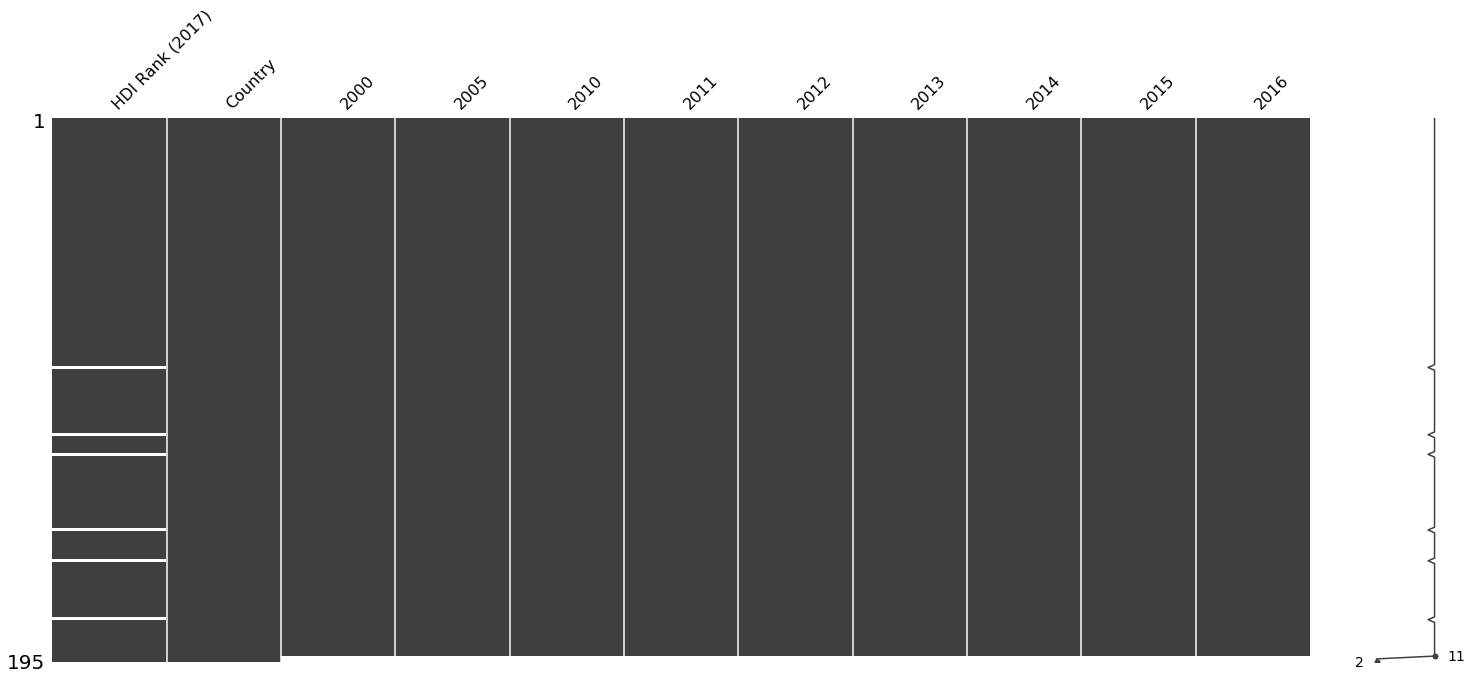

In [9]:
### Under 5 Data
print('TBC :\n', u5_data.isna().sum())

msno.matrix(u5_data);

TBC :
 HDI Rank (2017)     6
Country             0
2000                7
2005               10
2010               10
2011               11
2012               12
2013               12
2014               15
2015               38
2016               44
dtype: int64


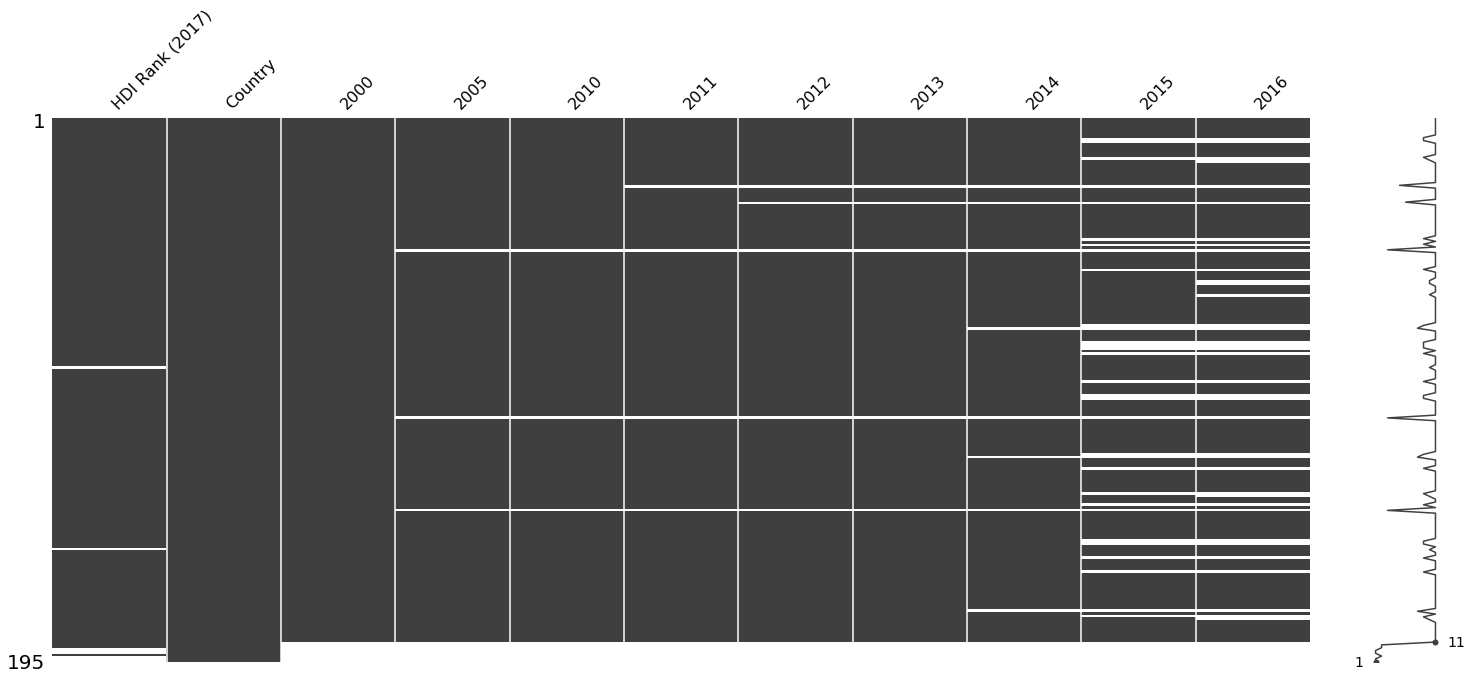

In [10]:
### Adult Data
print('TBC :\n', adl_data.isna().sum())

msno.matrix(adl_data);

##### Heatmap

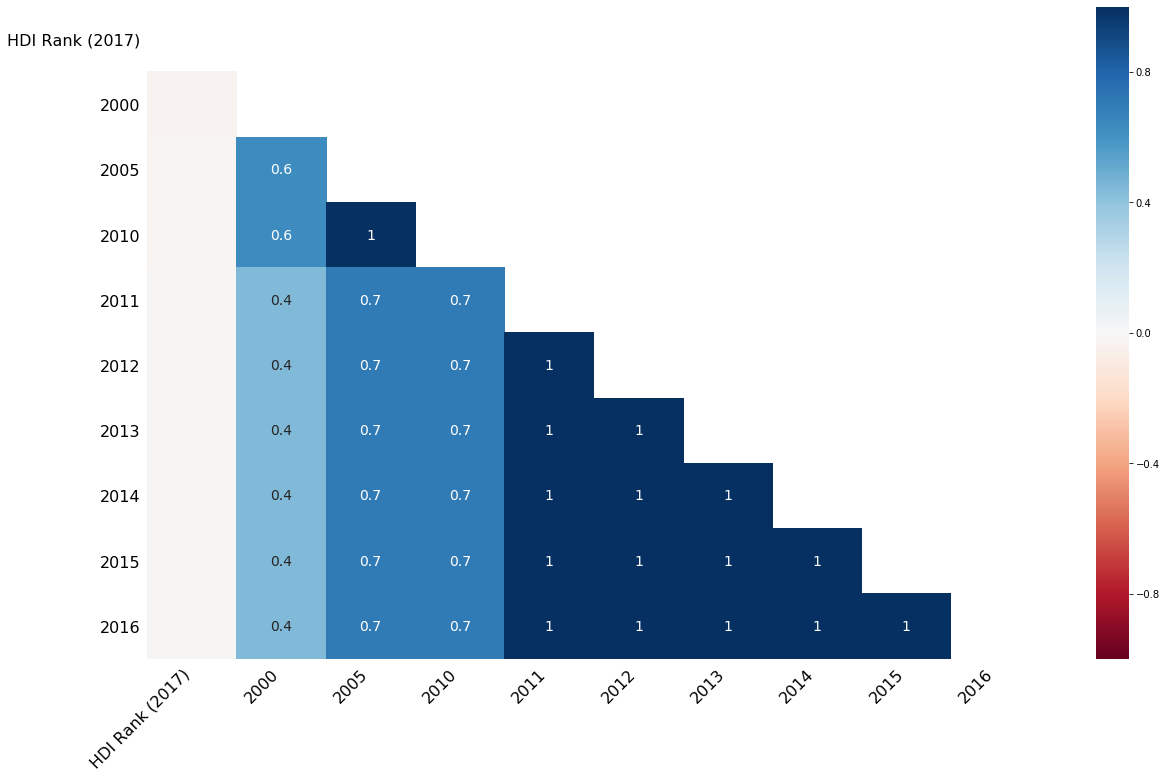

In [11]:
### TBC incidence
msno.heatmap(tbc_data);

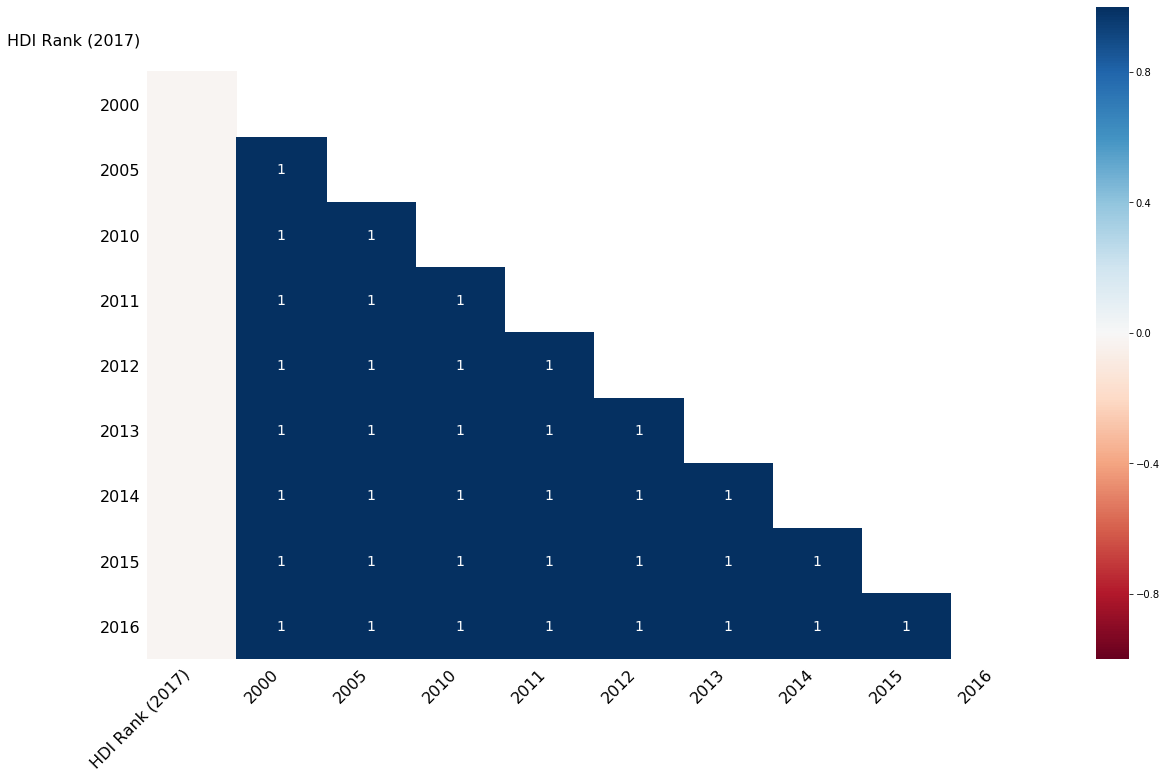

In [12]:
### Under 5 mortality rate
msno.heatmap(u5_data);

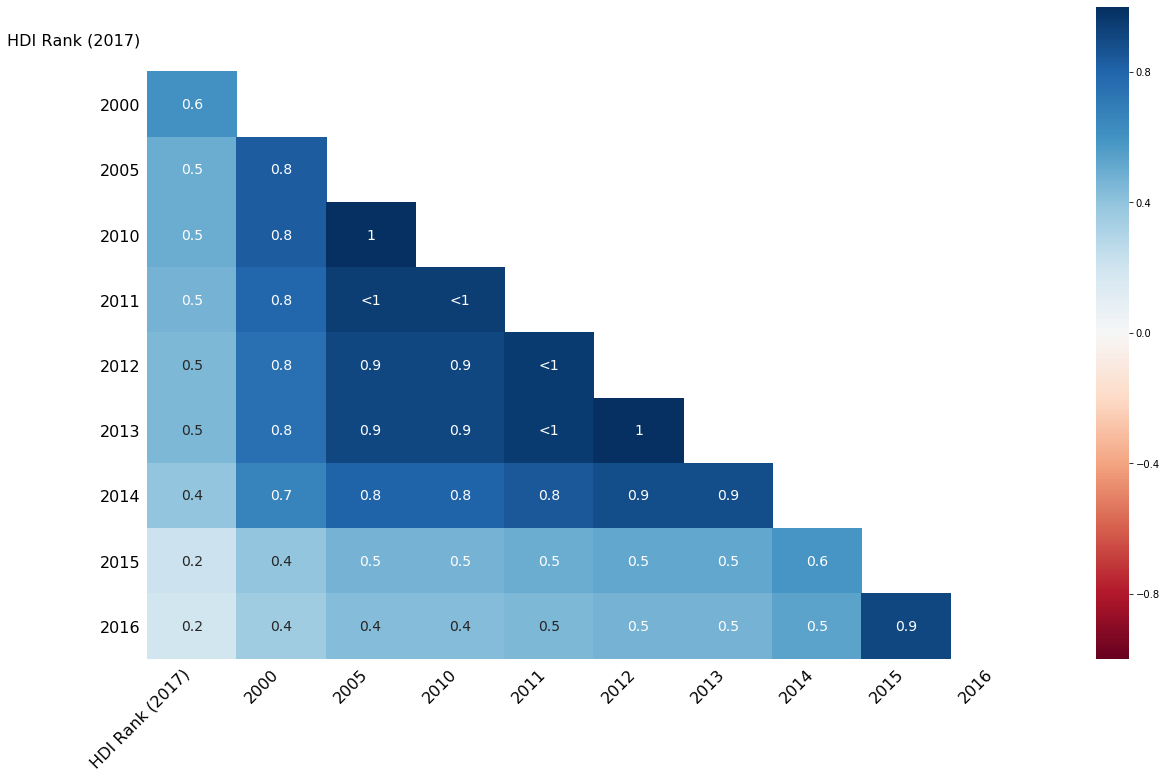

In [13]:
### Adult mortality rate
msno.heatmap(adl_data);

## # Skewness and Kurtosis

In [14]:
def plot_sk(dataset_name):
    plt.rcParams['figure.figsize'] = [12, 4]
    plt.subplots_adjust(wspace=0.2)
    plt.subplot(121)
    sns.distplot(dataset_name.skew(), color='blue', axlabel='Skewness')
    plt.subplot(122)
    sns.distplot(dataset_name.kurt(), color='red', axlabel='Kurtosis')
    plt.show()

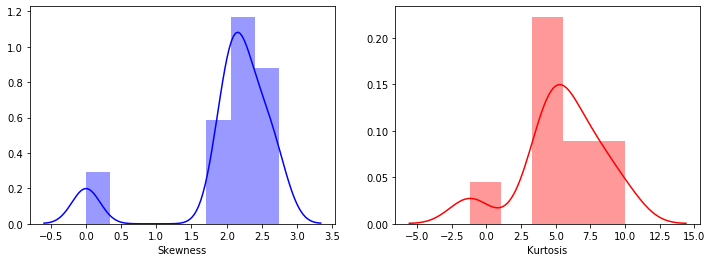

In [15]:
### TBC Incidence
plot_sk(tbc_data)

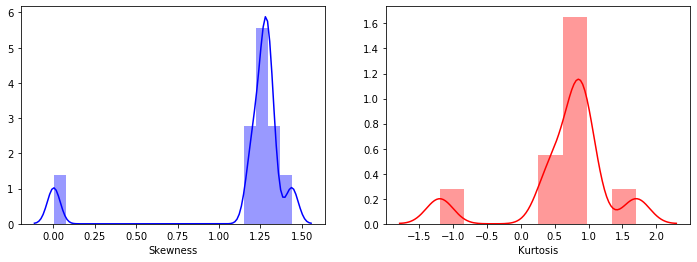

In [16]:
### Under 5 Mortality
plot_sk(u5_data)

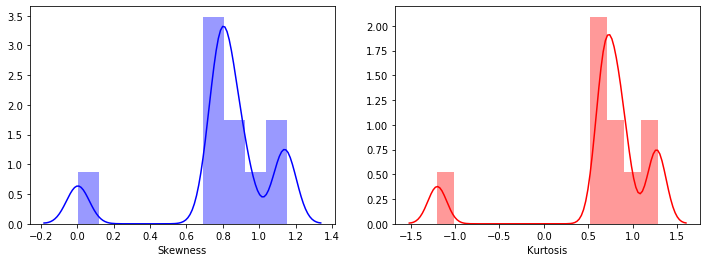

In [17]:
### Adult Mortality
plot_sk(adl_data)

## # Find Correlation

In [18]:
def heat_map(dataset_name):
    f , ax = plt.subplots(figsize = (10, 7))
    sns.heatmap(dataset_name.corr(),cmap='coolwarm', annot=True, linewidths=0.01);

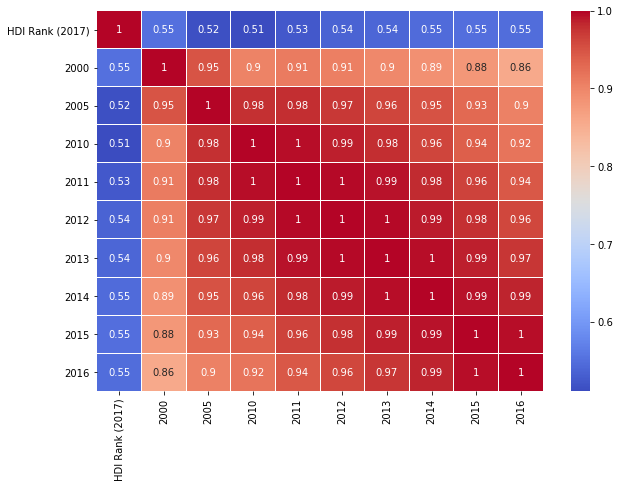

In [19]:
### TBC incidence
heat_map(tbc_data)

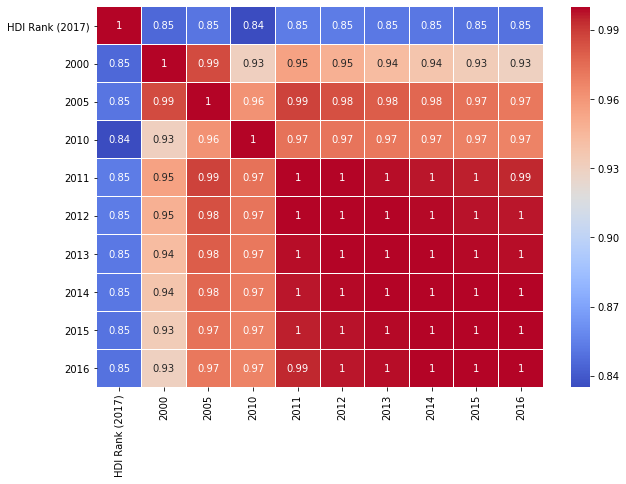

In [20]:
### Under 5 mortality
heat_map(u5_data)

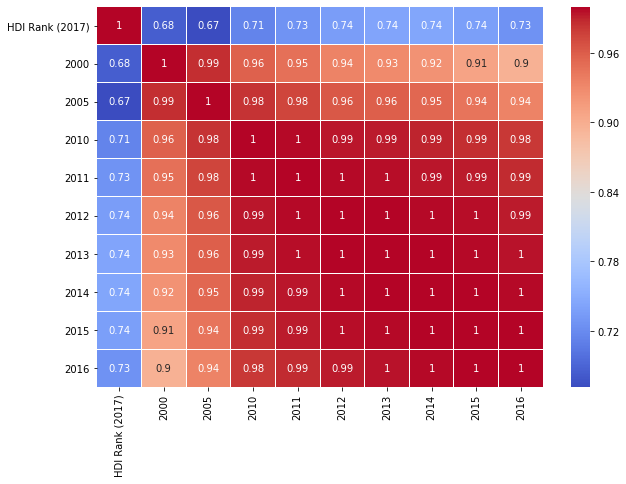

In [21]:
### Adult mortality
heat_map(adl_data)

## # Missing Value Analysis

#### TBC Incidence

In [22]:
total = tbc_data.isnull().sum().sort_values(ascending=False)
percent = (tbc_data.isnull().sum()/tbc_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total', 'Percent'])
missing_data.index.name ='Feature'

missing_data

,Total,Percent
Feature,,
HDI Rank (2017),6,0.030769
2000,5,0.025641
2010,2,0.010256
2005,2,0.010256
2016,1,0.005128
2015,1,0.005128
2014,1,0.005128
2013,1,0.005128
2012,1,0.005128


In [23]:
for my_col in tbc_data.columns:
    tbc_data = tbc_data.drop(tbc_data.loc[tbc_data[my_col].isnull()].index)

In [24]:
print('TBC :\n', tbc_data.isna().sum())

TBC :
 HDI Rank (2017)    0
Country            0
2000               0
2005               0
2010               0
2011               0
2012               0
2013               0
2014               0
2015               0
2016               0
dtype: int64


#### Under 5 Mortality

In [25]:
total = u5_data.isnull().sum().sort_values(ascending=False)
percent = (u5_data.isnull().sum()/u5_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total', 'Percent'])
missing_data.index.name ='Feature'

missing_data

,Total,Percent
Feature,,
HDI Rank (2017),6,0.030769
2016,2,0.010256
2015,2,0.010256
2014,2,0.010256
2013,2,0.010256
2012,2,0.010256
2011,2,0.010256
2010,2,0.010256
2005,2,0.010256


In [26]:
for my_col in u5_data.columns:
    u5_data = u5_data.drop(u5_data.loc[u5_data[my_col].isnull()].index)

In [27]:
print('TBC :\n', u5_data.isna().sum())

TBC :
 HDI Rank (2017)    0
Country            0
2000               0
2005               0
2010               0
2011               0
2012               0
2013               0
2014               0
2015               0
2016               0
dtype: int64


#### Adult Mortality

In [28]:
total = adl_data.isnull().sum().sort_values(ascending=False)
percent = (adl_data.isnull().sum()/adl_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total', 'Percent'])
missing_data.index.name ='Feature'

missing_data

,Total,Percent
Feature,,
2016,44,0.225641
2015,38,0.194872
2014,15,0.076923
2013,12,0.061538
2012,12,0.061538
2011,11,0.056410
2010,10,0.051282
2005,10,0.051282
2000,7,0.035897


In [29]:
for my_col in adl_data.columns:
    adl_data = adl_data.drop(adl_data.loc[adl_data[my_col].isnull()].index)

In [30]:
print('TBC :\n', u5_data.isna().sum())

TBC :
 HDI Rank (2017)    0
Country            0
2000               0
2005               0
2010               0
2011               0
2012               0
2013               0
2014               0
2015               0
2016               0
dtype: int64


## Scatter Plot

#### TBC Incidence

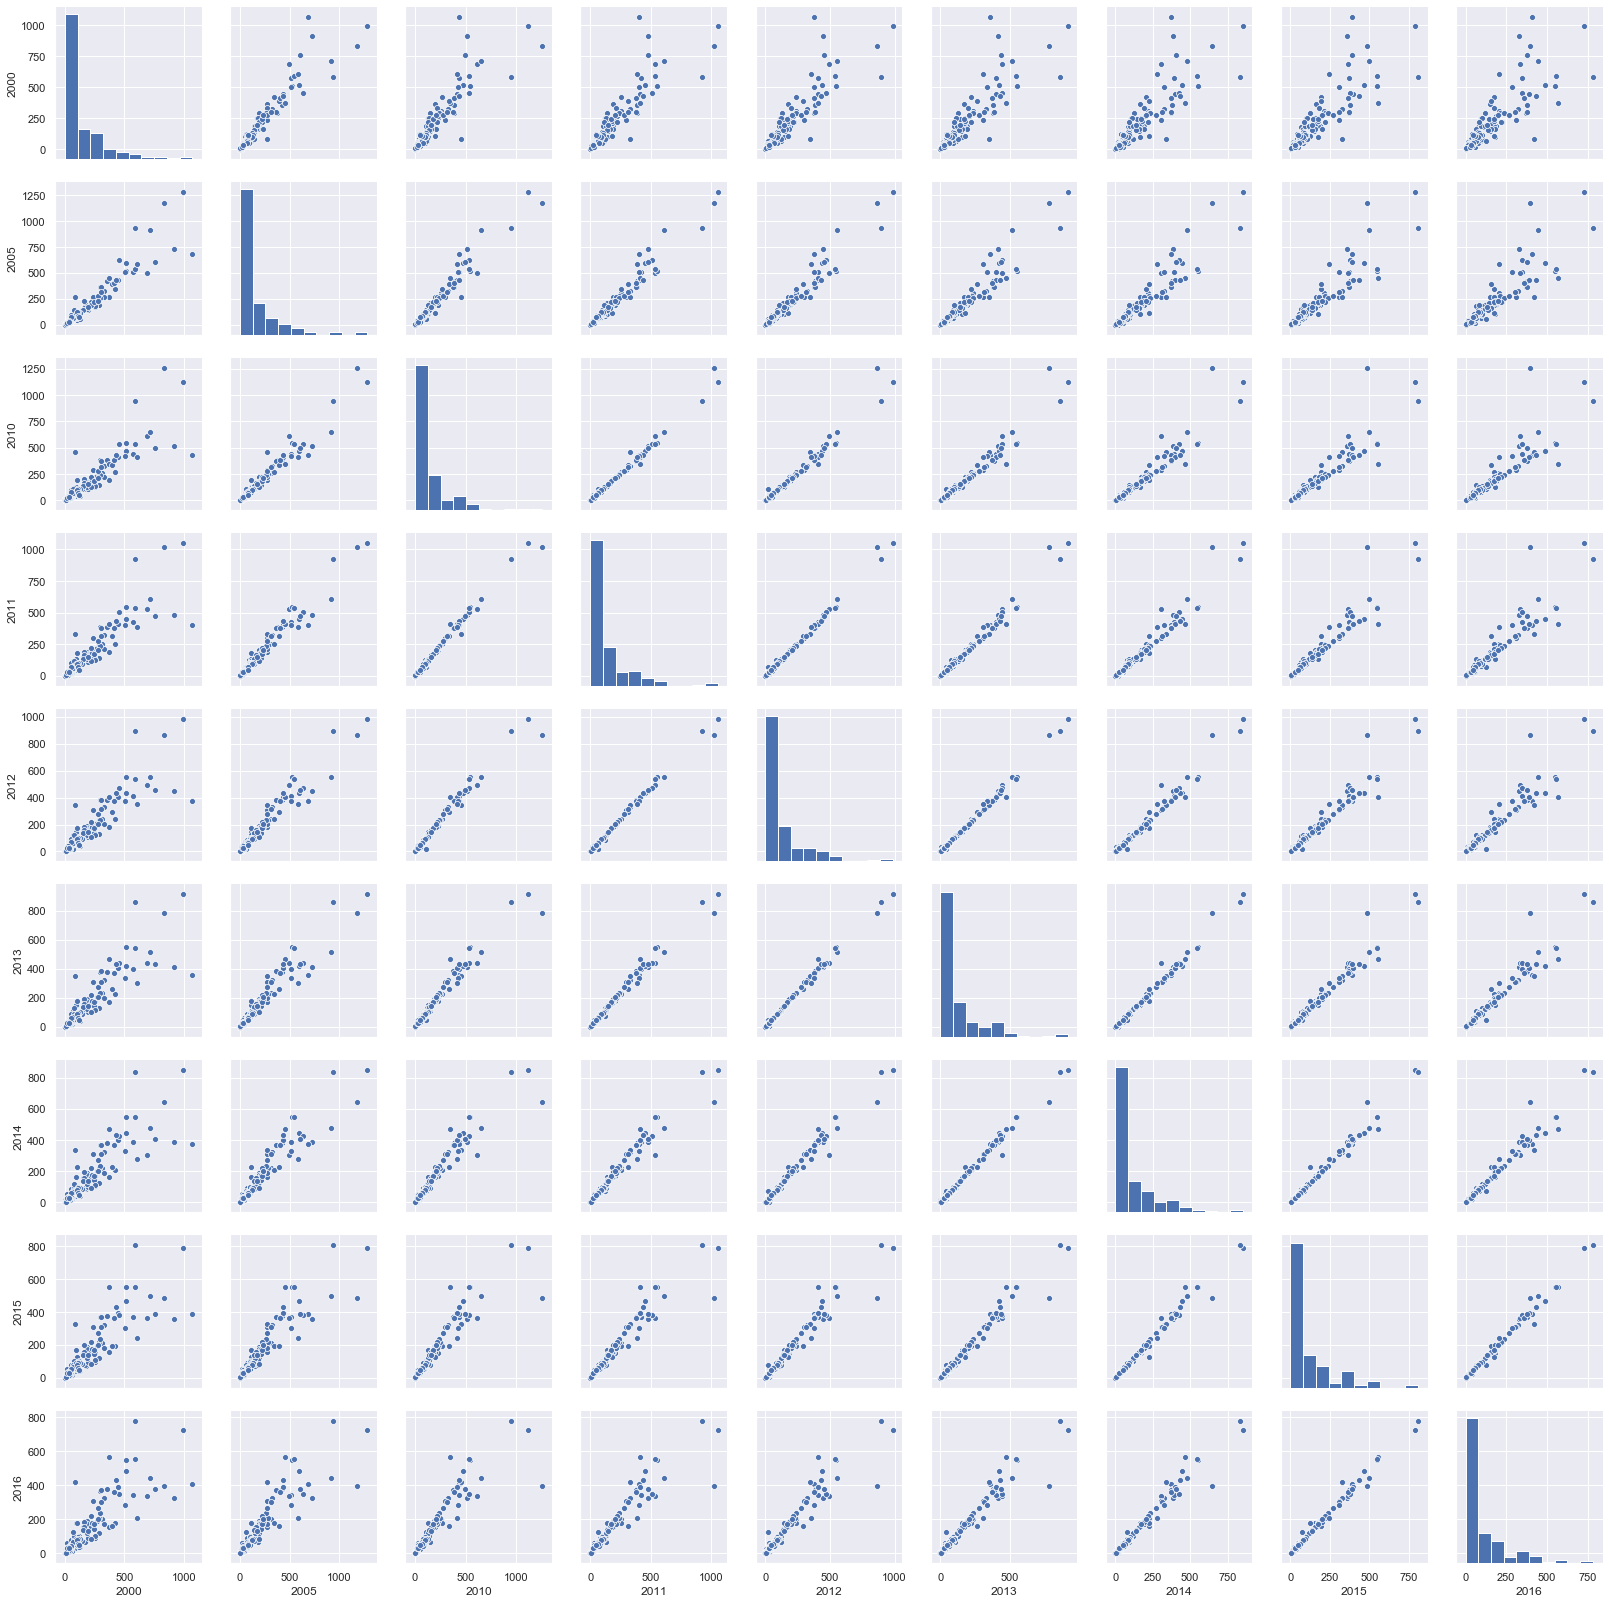

In [32]:
sns.set()
sns.pairplot(tbc_data[tbc_data.columns[2:]], height = 2.5)
plt.show();

#### Under 5 Mortality

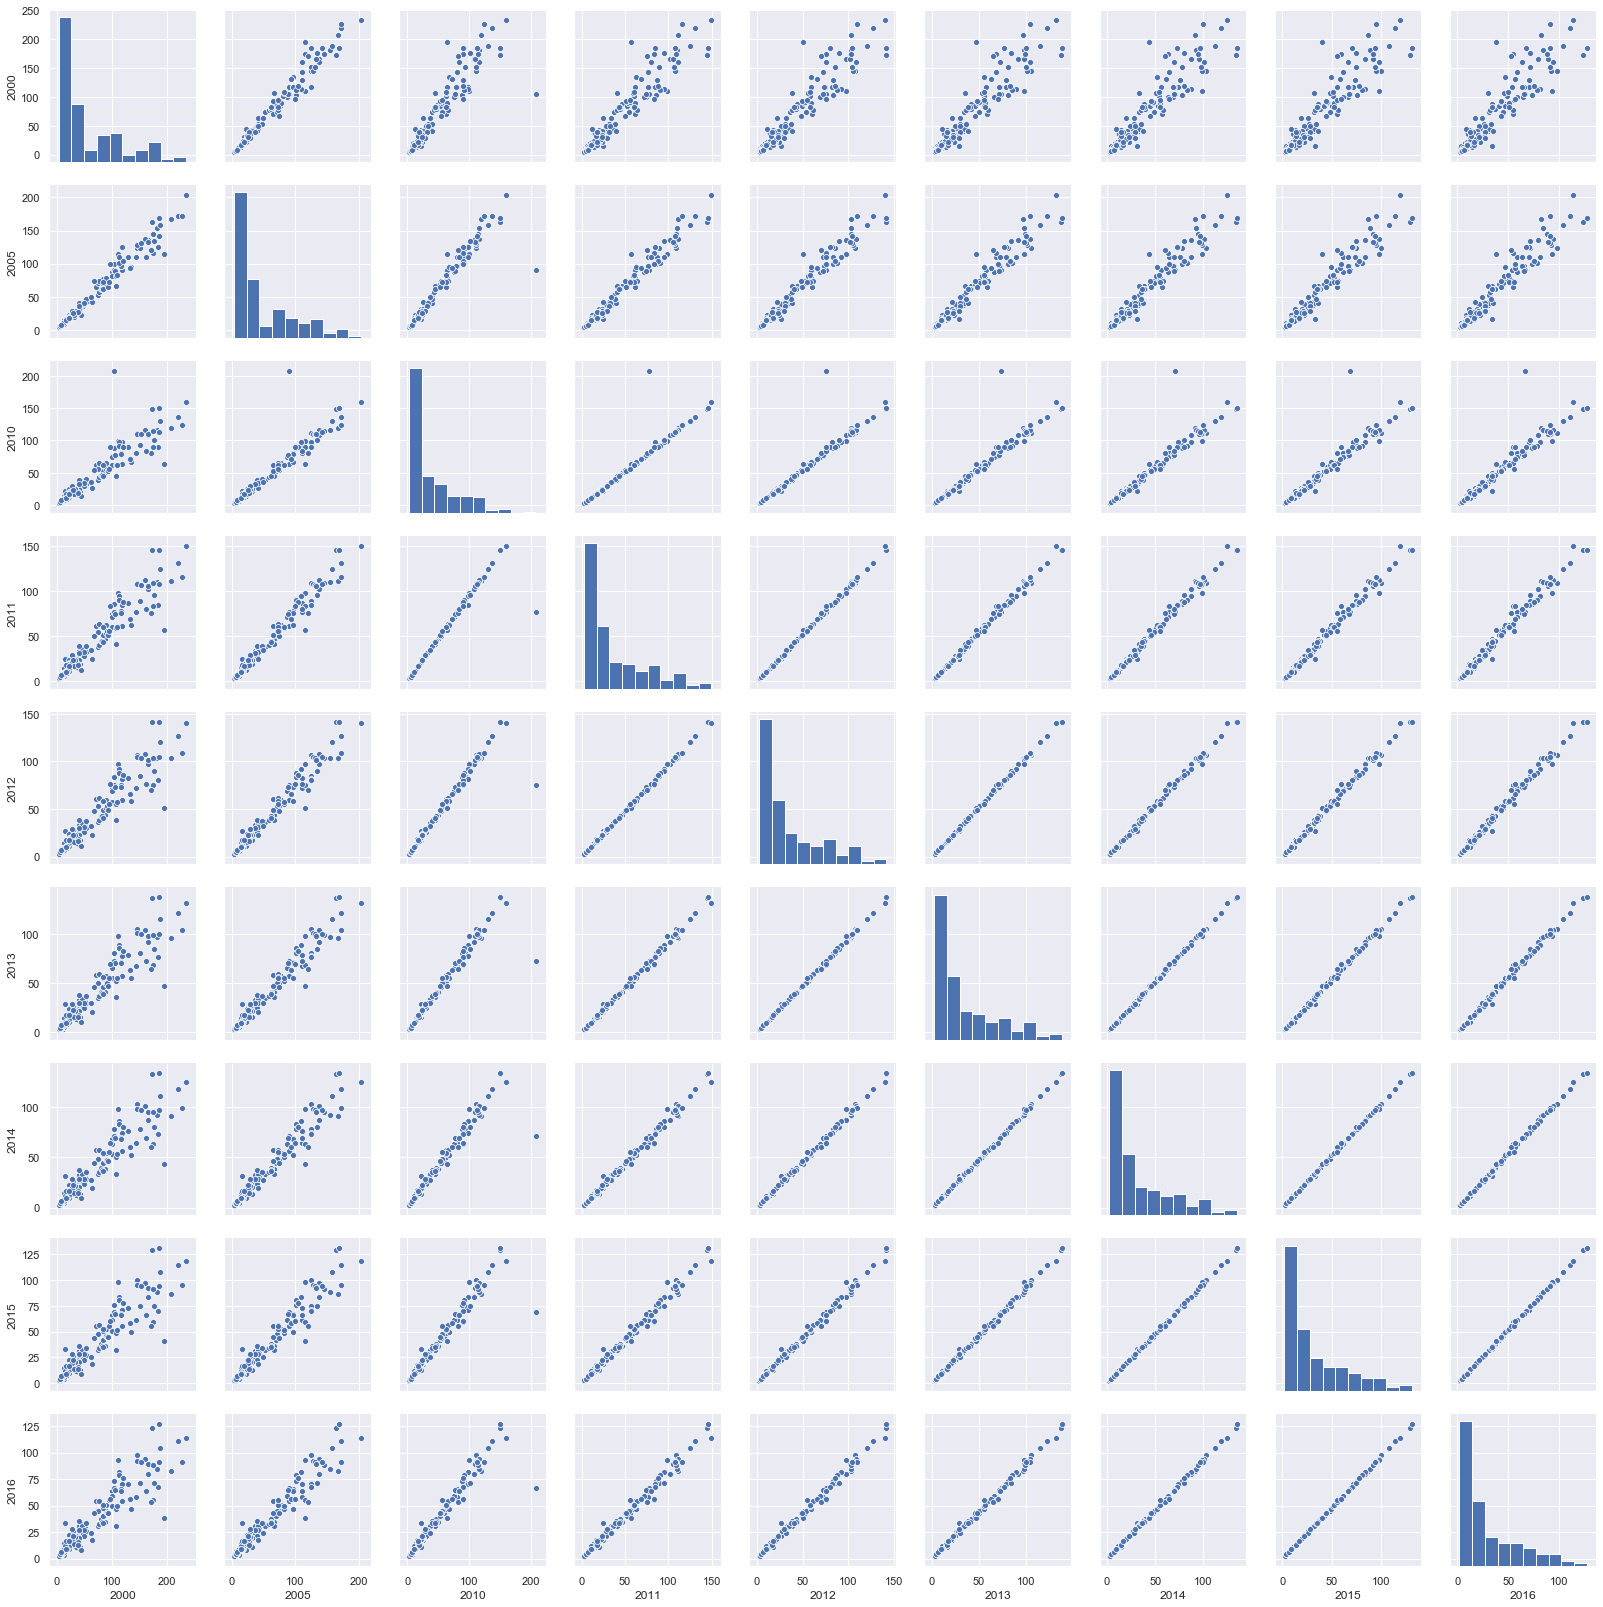

In [34]:
sns.set()
sns.pairplot(u5_data[u5_data.columns[2:]], height = 2.5)
plt.show();

#### Adult Mortality

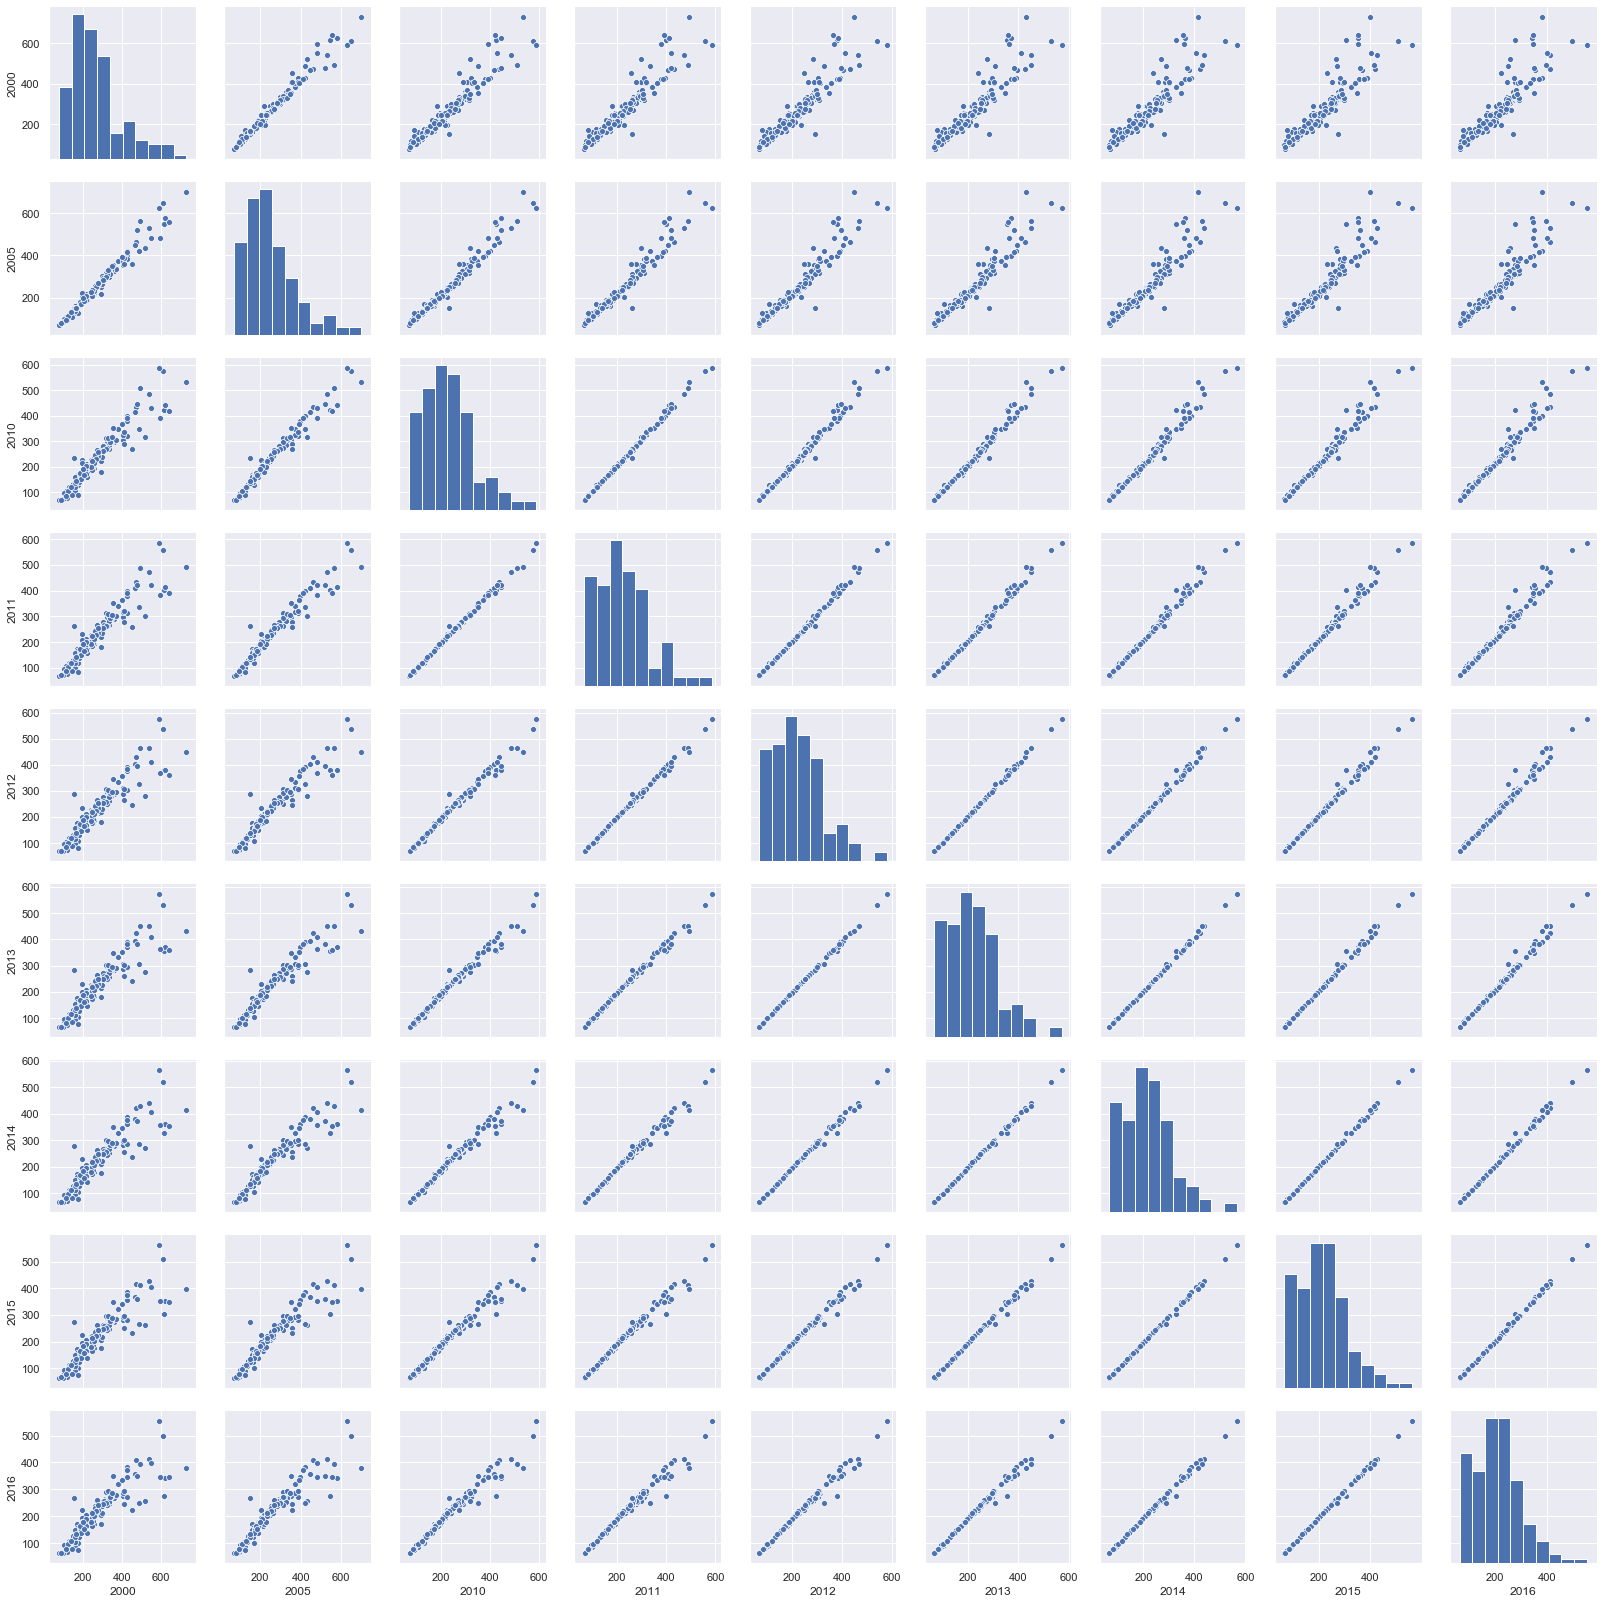

In [35]:
sns.set()
sns.pairplot(adl_data[adl_data.columns[2:]], height = 2.5)
plt.show();

## Save Clean Data

In [40]:
tbc_data.to_csv(os.path.join('clean_dataset', "tbc_incidence.csv"), index=False)
u5_data.to_csv(os.path.join('clean_dataset', "under5_mortality.csv"), index=False)
adl_data.to_csv(os.path.join('clean_dataset', "adult_mortality.csv"), index=False)